In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras import initializers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pickle
filename = 'regul_red3'
fileest = 'estimations3'
#result = cross_val_score(estimator, X, y cv = kfold())
#print(result.mean(), result.std())

In [2]:
try: 
    with open(filename, 'rb') as f1:
        res = pickle.load(f1)
except: 
    res = {}

In [3]:
try: 
    with open(fileest, 'rb') as f2:
        resest = pickle.load(f2)
except: 
    resest = {}

In [4]:
def normalise(dataf):
    mu    = 0
    sigma = 0
    mu = dataf.mean()
    sigma = dataf.std( ddof=0)
    snorm = dataf
    snorm.columns = ['normalised']
    snorm =(snorm - mu )/ sigma
    dtnorm = pd.concat([dataf,snorm],  axis =1)
    dtnorm.columns = ['x', 'nx']
    print(mu, sigma)
    print(snorm.head(5))
    return dtnorm , mu , sigma

data = pd.read_csv('ex1data1.txt', header=None,sep =',', names= ['x','y'])
y = data['y'].to_numpy()
norm,mu, sigma = normalise(data['x'])
print(norm)
print(mu)
print(sigma)
X = norm['nx'].to_numpy()


8.159800000000002 3.8498839959227156
0   -0.532406
1   -0.683683
2    0.093198
3   -0.300425
4   -0.597421
Name: x, dtype: float64
          x        nx
0    6.1101 -0.532406
1    5.5277 -0.683683
2    8.5186  0.093198
3    7.0032 -0.300425
4    5.8598 -0.597421
..      ...       ...
92   5.8707 -0.594589
93   5.3054 -0.741425
94   8.2934  0.034702
95  13.3940  1.359573
96   5.4369 -0.707268

[97 rows x 2 columns]
8.159800000000002
3.8498839959227156


-1.2103741320348982 -0.30125583036483905
estimation 35000:  [[6439.0923]]
estimation 70000:  [[47226.742]]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
None


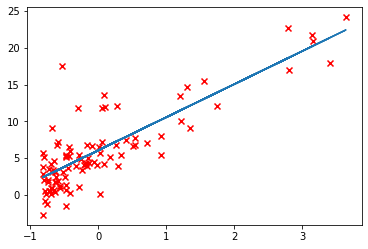

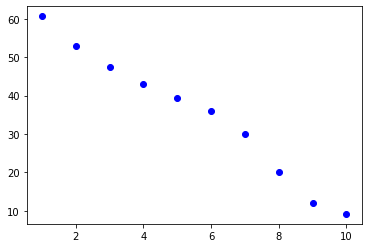

In [5]:

model = Sequential()
model.add(Dense(1, input_dim= 1, kernel_initializer =initializers.RandomNormal(seed= 1), activation='linear'))
model.add(Dense(1, input_dim= 1, kernel_initializer =initializers.random_normal(seed= 1)))
model.compile(loss="mean_squared_error", optimizer ='sgd')

    #model.add(Dense(8, activation='relu'))
    #model.add(Dense(1, activation='relu'))
    #model.add(Dense(units = 64, activation='relu'))
model.save_weights('model.h5')
epoch = 10
bz = 15
history =model.fit(X,y, epochs =  epoch,  batch_size = bz,verbose  = 0)
estimation = [] 
for un_x in X :
    estimation.append(model.predict([un_x]).flatten().tolist()[0])
    
plt.scatter(X, y, c='red', marker ='x')
plt.plot(X, estimation)    
est1 = (3.5000 - mu) / sigma
est2 = (7.0000 - mu) / sigma

print(est1, est2)
ret1 = (model.predict([est1])*10000)
ret2 = (model.predict([est2])*10000)
print('estimation 35000: ',ret1)
print('estimation 70000: ',ret2)
loss5 = history.history['loss']
cle = str(epoch) + '_' + str(bz)
resest[cle] = [ret1, ret2]
res[cle] = loss5
with open(filename, 'wb') as f1:
     pickle.dump(res, f1)
with open(fileest, 'wb') as f2:
     pickle.dump(resest, f2)        
epoch = range(1,epoch + 1)
plt.figure()
plt.plot(epoch,loss5,'bo')
print( model.summary())

In [ ]:
loss5 = history.history['loss']
del model
model = Sequential()
model.add(Dense(1, input_dim= 1, kernel_initializer =initializers.RandomNormal(seed= 1), activation='linear'))
#model.add(Dense(units = 64, activation='relu'))
model.add(Dense(1, input_dim= 1, kernel_initializer =initializers.random_normal(seed= 1)))
model.compile(loss="mean_squared_error", optimizer ='sgd')

    #model.add(Dense(8, activation='relu'))
    #model.add(Dense(1, activation='relu'))
model.load_weights('model.h5')

history =model.fit(X,y, epochs =  7,  batch_size = 1,verbose  = 0)
loss10 = history.history['loss']
del model
model = Sequential()
model.add(Dense(1, input_dim= 1, kernel_initializer =initializers.RandomNormal(seed= 1), activation='linear'))
#model.add(Dense(units = 64, activation='relu'))
model.add(Dense(1, input_dim= 1, kernel_initializer =initializers.random_normal(seed= 1)))
model.compile(loss="mean_squared_error", optimizer ='sgd')

    #model.add(Dense(8, activation='relu'))
    #model.add(Dense(1, activation='relu'))
model.load_weights('model.h5')
history =model.fit(X,y, epochs =  7,  batch_size = 40,verbose  = 0)
loss20 = history.history['loss']


In [ ]:
epoch = range(1,8)
plt.figure()
plt.plot(epoch,loss5,'bo')
plt.plot(epoch,loss10,'ro')
plt.plot(epoch,loss20,'go')
plt.legend(["size 5","size 1", "size 40"])
plt.show()